In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor

from sklearn.metrics import  mean_squared_error

plt.style.use('fivethirtyeight')
clolor_pal=sns.color_palette()

In [2]:
data=pd.read_csv('PJME_hourly.csv')

In [4]:
#data.head()
#data.tail()
data.sample(10)

,Datetime,PJME_MW
75279,2010-05-30 10:00:00,30242.0
100323,2013-07-21 04:00:00,31102.0
20585,2004-08-26 23:00:00,35447.0
90103,2012-09-19 06:00:00,24779.0
16168,2003-02-26 21:00:00,40879.0
15480,2003-03-26 05:00:00,22514.0
128806,2016-04-21 23:00:00,26311.0
20521,2004-08-28 07:00:00,28387.0
56390,2008-07-25 04:00:00,26298.0
120765,2015-03-22 22:00:00,31585.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [6]:
data=data.set_index('Datetime')

In [7]:
data.index=pd.to_datetime(data.index)

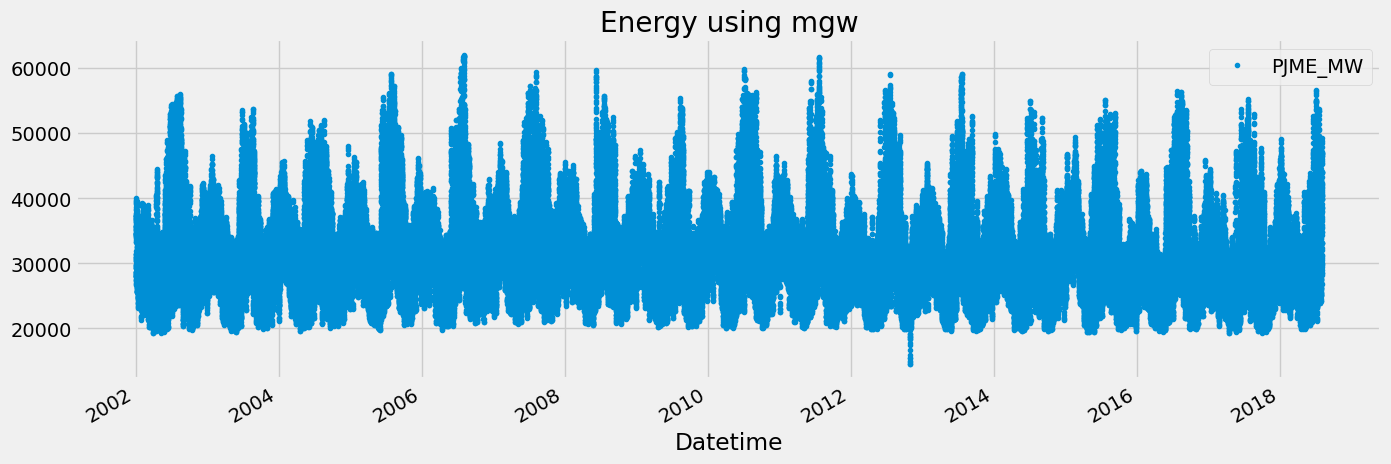

In [8]:
data.plot(figsize=(15,5),style='.',color=clolor_pal[0],title='Energy using mgw')
plt.show()

# Feature Creating

In [10]:
# hour - dayofweek-month - quarter - year - dayofyear

In [11]:
data['hour']=data.index.hour
data['dayofweek']=data.index.dayofweek
data['month']=data.index.month
data['quarter']=data.index.quarter
data['year']=data.index.year
data['dayofyear']=data.index.dayofyear

In [12]:
data.sample()

,PJME_MW,hour,dayofweek,month,quarter,year,dayofyear
Datetime,,,,,,,
2007-08-01 23:00:00,43747.0,23,2,8,3,2007,213


Text(0.5, 1.0, 'Energy usage by hour')

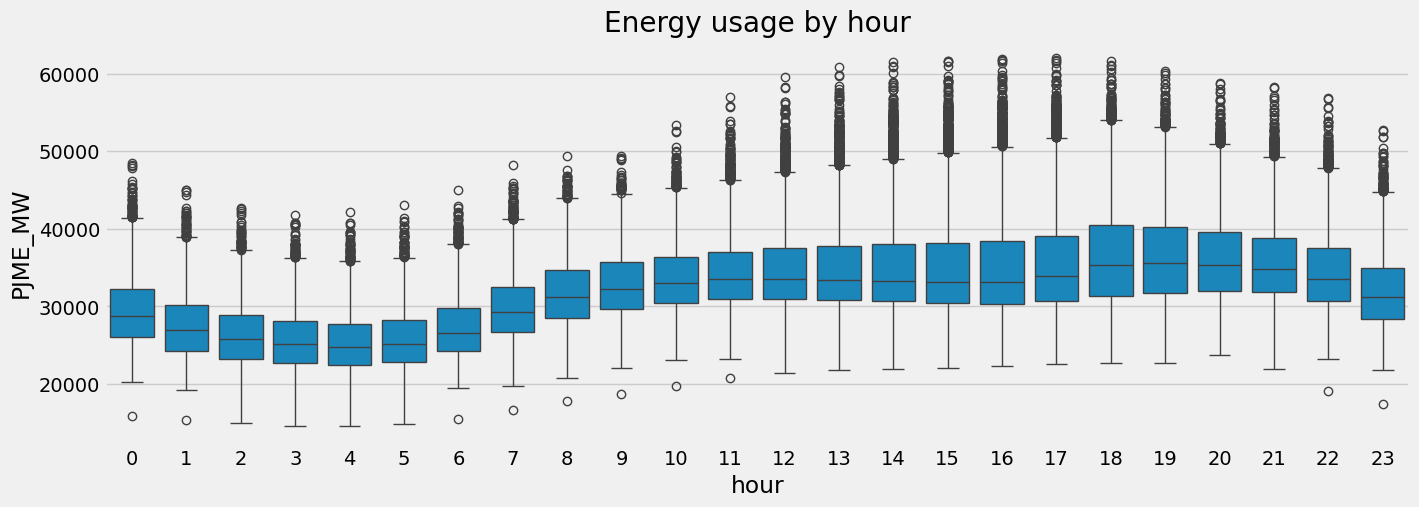

In [13]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=data,x='hour',y='PJME_MW')
plt.title('Energy usage by hour')

Text(0.5, 1.0, 'Energy usage by month')

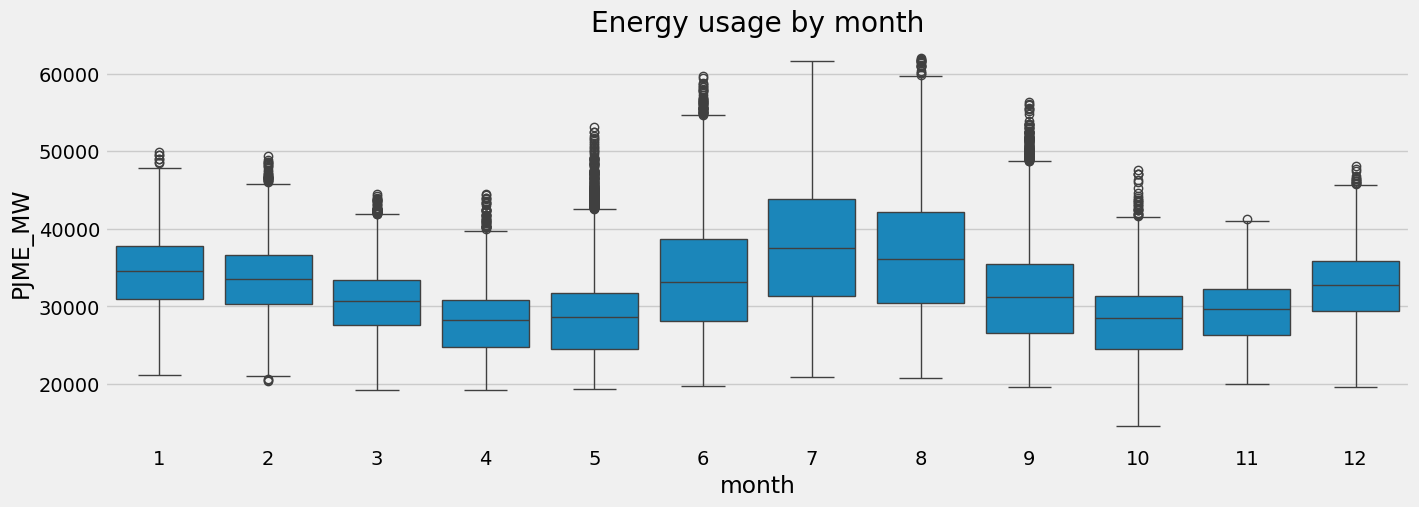

In [14]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=data,x='month',y='PJME_MW')
plt.title('Energy usage by month')

Text(0.5, 1.0, 'Energy usage by quarter')

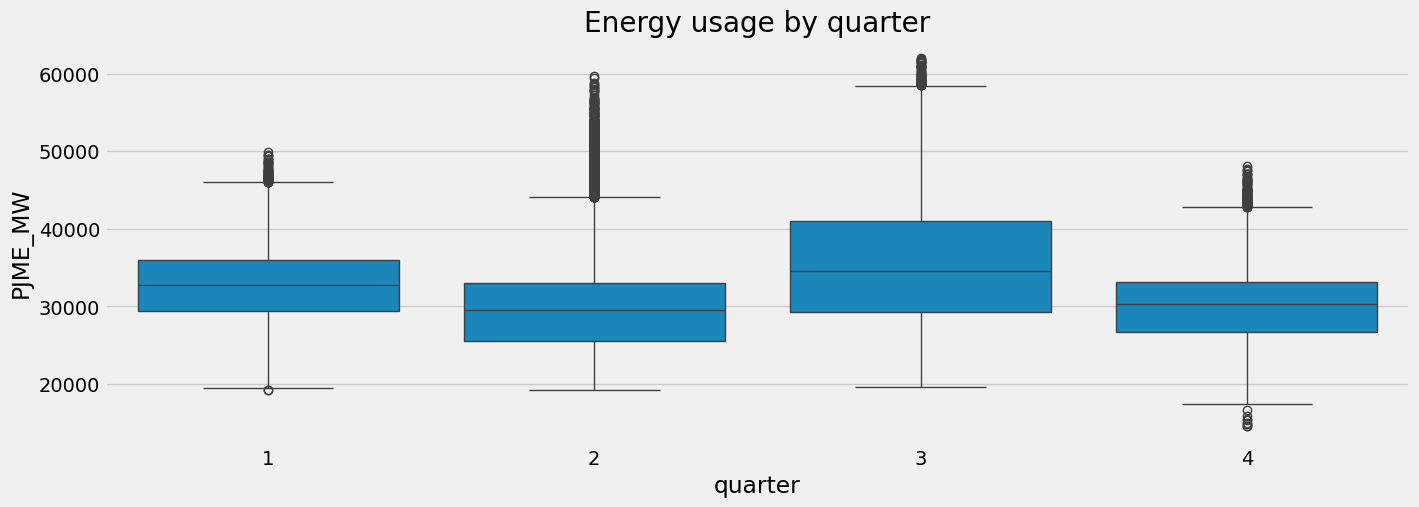

In [15]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=data,x='quarter',y='PJME_MW')
plt.title('Energy usage by quarter')

# model

In [17]:
train_set=data.loc[data.index<'01-01-2015']
test_set=data.loc[data.index>='01-01-2015']

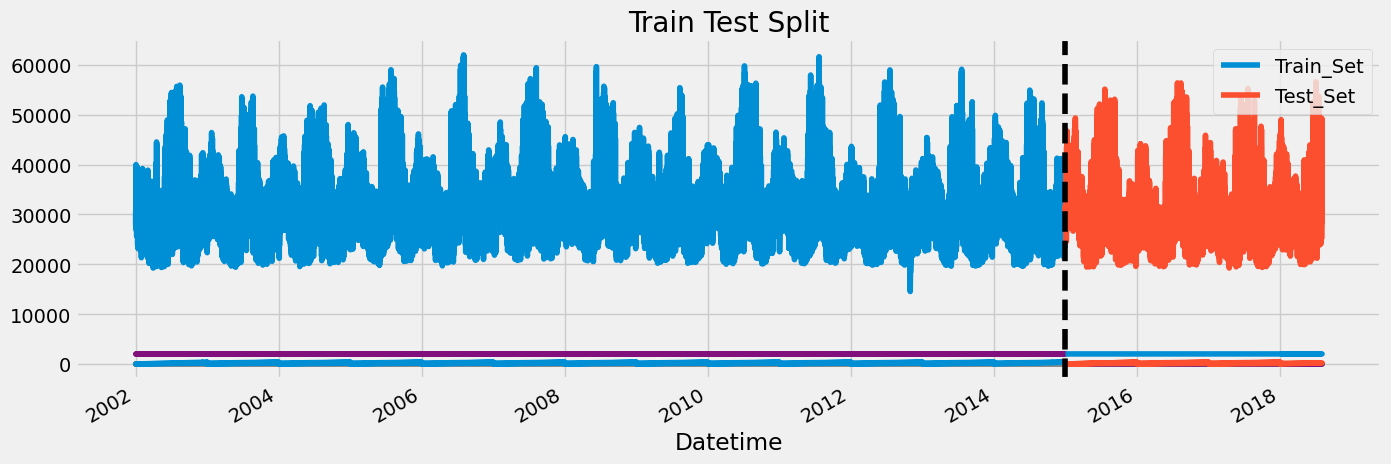

In [18]:
fig,ax=plt.subplots(figsize=(15,5))
train_set.plot(ax=ax)
test_set.plot(ax=ax)
ax.axvline('01-01-2015',color='Black',ls='--')
plt.legend(['Train_Set', 'Test_Set'])
plt.title('Train Test Split')
plt.show()

In [19]:
x_train=train_set.drop('PJME_MW',axis=1)
y_train=train_set['PJME_MW']

x_test=test_set.drop('PJME_MW',axis=1)
y_test=test_set['PJME_MW']

In [20]:
model=XGBRegressor(n_estimator=1000 , early_stopping_round=50)

In [21]:
model.fit(x_train,y_train)

C:\Users\M\anaconda3\envs\AI\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:59:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "early_stopping_round", "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_round=50,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimator=1000,
             n_estimators=None, n_jobs=None, ...)

In [22]:
model.score(x_train,y_train)

0.9324661462266746

In [23]:
pre=model.predict(x_test)

In [24]:
mean_squared_error(pre,y_test)

17586869.156182434

In [25]:
np.sqrt(mean_squared_error(pre,y_test))

4193.67012963376